<a href="https://colab.research.google.com/github/IYORIYAGAMI/OPEN-SOURCE/blob/main/Data_Science_Project_Day_1_%26_2_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Day 2


In [2]:
# STEP 1 — Install required libraries
# - transformers, torch : model & training
# - scikit-learn : metrics & preprocessing
# - pandas : csv/excel
# - openpyxl : read xlsx
# - streamlit : UI
# - matplotlib : charts for students
# - wget/unzip/curl used later for ngrok install
!pip install -q transformers torch scikit-learn pandas openpyxl streamlit matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.9 MB/s eta 0:00:00


In [3]:
# STEP 2 — Upload your dataset (Excel or CSV)
# - Expect columns: 'text' and 'sentiment'
from google.colab import files
import pandas as pd

print("Upload your .xlsx or .csv file (it must contain 'text' and 'sentiment' columns).")
uploaded = files.upload()  # interactive upload
file_name = list(uploaded.keys())[0]

# Read Excel or CSV automatically
if file_name.lower().endswith('.xlsx'):
    df = pd.read_excel(file_name)
else:
    df = pd.read_csv(file_name)

# Keep only required cols (fail fast if missing)
required = ['text', 'sentiment']
if not set(required).issubset(df.columns):
    raise ValueError(f"Uploaded file must contain columns: {required}. Found: {list(df.columns)}")

# Show top rows and basic info
print("First 5 rows of your dataset:")
display(df.head())
print("\nData info:")
print(df.info())


Upload your .xlsx or .csv file (it must contain 'text' and 'sentiment' columns).


Saving Twitter_Data.csv to Twitter_Data.csv
First 5 rows of your dataset:


,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative



Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB
None


Class counts:
sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

Label mapping (name -> id): {'negative': 0, 'neutral': 1, 'positive': 2}


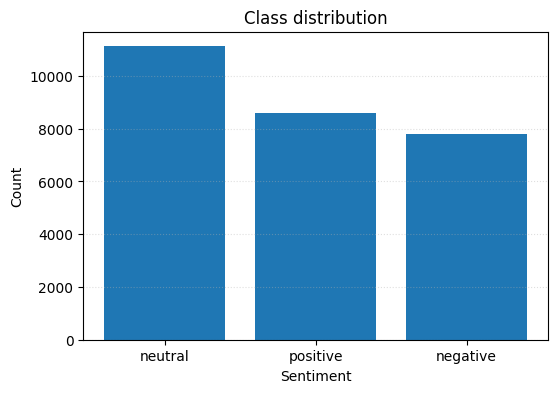

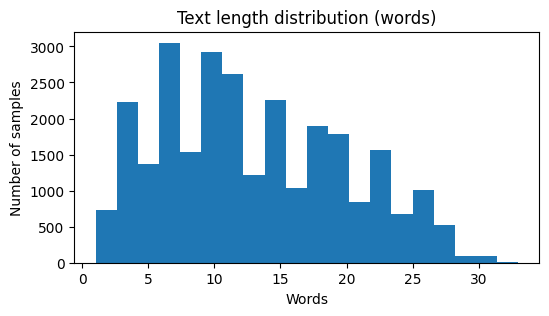

In [4]:
# STEP 3 — Clean data, drop missing, encode labels, plot class distribution
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Keep necessary columns and drop rows with missing text/sentiment
df = df[['text','sentiment']].dropna().reset_index(drop=True)

# Short cleaning: strip whitespace
df['text'] = df['text'].astype(str).str.strip()
df['sentiment'] = df['sentiment'].astype(str).str.strip().str.lower()

# Show counts per class
print("Class counts:")
print(df['sentiment'].value_counts())

# Encode labels to integers (needed for model)
le = LabelEncoder()
df['label'] = le.fit_transform(df['sentiment'])
label_names = list(le.classes_)  # e.g. ['negative','neutral','positive']
label2id = {lab: int(i) for i, lab in enumerate(label_names)}
id2label = {int(i): lab for i, lab in enumerate(label_names)}
print("\nLabel mapping (name -> id):", label2id)

# Plot class distribution (bar)
counts = df['sentiment'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.title("Class distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.grid(axis='y', linestyle=':', alpha=0.4)
plt.show()

# Also show simple text length distribution to illustrate variety
df['text_len'] = df['text'].str.split().map(len)
plt.figure(figsize=(6,3))
plt.hist(df['text_len'], bins=20)
plt.title("Text length distribution (words)")
plt.xlabel("Words")
plt.ylabel("Number of samples")
plt.show()


Class counts:
sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

Label mapping (name -> id): {'negative': 0, 'neutral': 1, 'positive': 2}


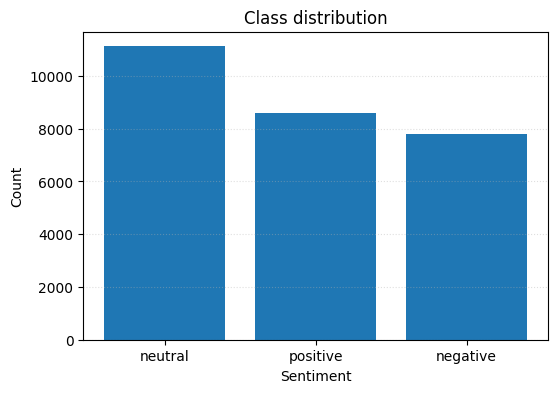

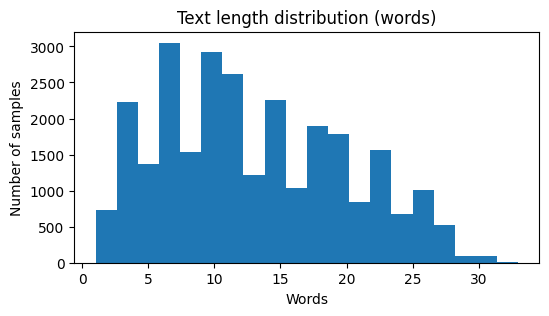

In [5]:
# STEP 3 — Clean data, drop missing, encode labels, plot class distribution
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Keep necessary columns and drop rows with missing text/sentiment
df = df[['text','sentiment']].dropna().reset_index(drop=True)

# Short cleaning: strip whitespace
df['text'] = df['text'].astype(str).str.strip()
df['sentiment'] = df['sentiment'].astype(str).str.strip().str.lower()

# Show counts per class
print("Class counts:")
print(df['sentiment'].value_counts())

# Encode labels to integers (needed for model)
le = LabelEncoder()
df['label'] = le.fit_transform(df['sentiment'])
label_names = list(le.classes_)  # e.g. ['negative','neutral','positive']
label2id = {lab: int(i) for i, lab in enumerate(label_names)}
id2label = {int(i): lab for i, lab in enumerate(label_names)}
print("\nLabel mapping (name -> id):", label2id)

# Plot class distribution (bar)
counts = df['sentiment'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.title("Class distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.grid(axis='y', linestyle=':', alpha=0.4)
plt.show()

# Also show simple text length distribution to illustrate variety
df['text_len'] = df['text'].str.split().map(len)
plt.figure(figsize=(6,3))
plt.hist(df['text_len'], bins=20)
plt.title("Text length distribution (words)")
plt.xlabel("Words")
plt.ylabel("Number of samples")
plt.show()


In [6]:
# STEP 4 — Split into train/validation and prepare tokenization inputs
from sklearn.model_selection import train_test_split

# 80/20 split (stratify if enough samples per class)
if df['label'].nunique() > 1 and min(df['label'].value_counts()) > 1:
    train_texts, val_texts, train_labels, val_labels = train_test_split(
        df['text'].tolist(), df['label'].tolist(), test_size=0.2, random_state=42, stratify=df['label']
    )
else:
    train_texts, val_texts, train_labels, val_labels = train_test_split(
        df['text'].tolist(), df['label'].tolist(), test_size=0.2, random_state=42
    )

print(f"Training samples: {len(train_texts)} | Validation samples: {len(val_texts)}")

# For speed in demos, you can optionally reduce size:
# train_texts = train_texts[:500]; train_labels = train_labels[:500]


Training samples: 21984 | Validation samples: 5496


In [7]:
# STEP 5 — Tokenize and build PyTorch Dataset
# - We will use a small tokenizer to keep this fast in Colab
from transformers import AutoTokenizer
import torch

MODEL_NAME = "prajjwal1/bert-tiny"  # tiny model -> very fast for demos

# Load tokenizer (fast)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# Tokenize with truncation + padding (max_length keeps inputs small)
train_enc = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_enc = tokenizer(val_texts, truncation=True, padding=True, max_length=128)

# PyTorch dataset class used by Trainer
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        # convert token arrays to torch tensors
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

train_ds = SentimentDataset(train_enc, train_labels)
val_ds = SentimentDataset(val_enc, val_labels)

print("Example tokenized input keys:", list(train_enc.keys()))
print("Dataset sizes ->", len(train_ds), len(val_ds))


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Example tokenized input keys: ['input_ids', 'token_type_ids', 'attention_mask']
Dataset sizes -> 21984 5496


In [8]:
# STEP 6 — Train fast with tiny model and capture history for plotting
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
import math, time

# Ensure label maps are simple Python types
id2label_fixed = {int(k): str(v) for k, v in id2label.items()}
label2id_fixed = {str(k): int(v) for k, v in label2id.items()}

# Load the tiny model for classification (fast)
model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=len(label_names),
    id2label=id2label_fixed,
    label2id=label2id_fixed
)

# Training arguments: 1 epoch to keep demo quick
training_args = TrainingArguments(
    output_dir="sentiment_model",
    do_train=True,
    do_eval=True,
    num_train_epochs=1,            # quick demo
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    logging_steps=50,
    save_strategy="no"             # don't save many checkpoints in demo
)

# Trainer handles training loop
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds
)

# Train (this will print progress)
start_time = time.time()
trainer.train()
print(f"Training done in {time.time()-start_time:.1f}s")


pytorch_model.bin:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: vinallewis0125 (vinallewis0125-bia) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
50,1.103800
100,1.081200
150,1.075800
200,1.076800
250,1.077000
300,1.067700
350,1.028100
400,1.016700
450,0.996400
500,0.987200


Training done in 91.3s


✅ Accuracy: 0.704

Detailed classification report (per-class precision/recall/f1):
              precision    recall  f1-score   support

    negative       0.69      0.67      0.68      1556
     neutral       0.68      0.69      0.69      2223
    positive       0.75      0.75      0.75      1717

    accuracy                           0.70      5496
   macro avg       0.71      0.70      0.71      5496
weighted avg       0.70      0.70      0.70      5496



<Figure size 600x400 with 0 Axes>

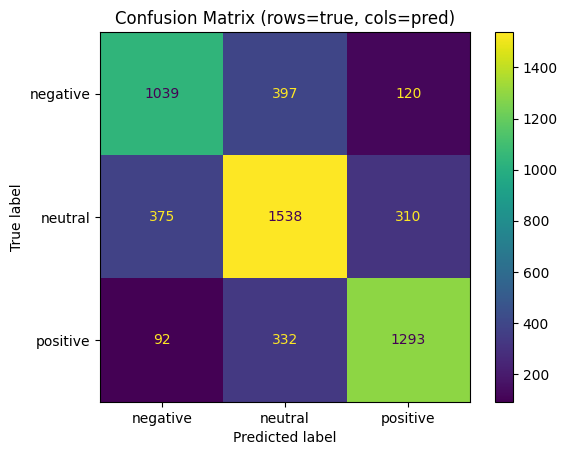


Metric explanations:
- Accuracy: fraction of all correct predictions.
- Precision (per class): when model predicts class X, how often is it correct?
- Recall (per class): of true class X examples, how many did the model find?
- F1: harmonic mean of precision and recall (balances both).


In [9]:
# STEP 7 — Evaluate model on validation set and show metrics with explanations
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# 1) Predict using the trainer on val_ds
preds = trainer.predict(val_ds)
y_true = val_labels
y_pred = np.argmax(preds.predictions, axis=1)

# 2) Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"✅ Accuracy: {acc:.3f}")
print("\nDetailed classification report (per-class precision/recall/f1):")
print(classification_report(y_true, y_pred, target_names=label_names))

# 3) Confusion matrix (visual)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
plt.figure(figsize=(6,4))
disp.plot(cmap=None)  # no explicit colors so students see default
plt.title("Confusion Matrix (rows=true, cols=pred)")
plt.show()

# 4) Short metric explanations (printed)
print("\nMetric explanations:")
print("- Accuracy: fraction of all correct predictions.")
print("- Precision (per class): when model predicts class X, how often is it correct?")
print("- Recall (per class): of true class X examples, how many did the model find?")
print("- F1: harmonic mean of precision and recall (balances both).")


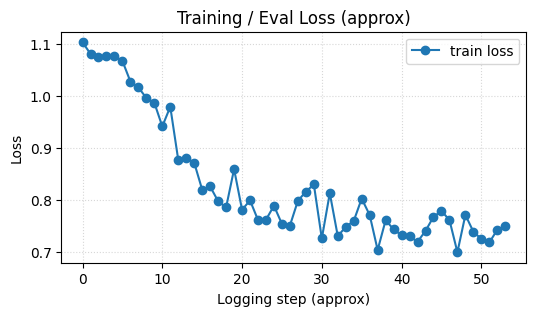

In [10]:
# STEP 8 — Plot training/eval loss from trainer logs (help students see learning curve)
# Note: Trainer stores log history in trainer.state.log_history (may include 'loss' and eval metrics)
import matplotlib.pyplot as plt

logs = trainer.state.log_history  # list of dicts
# Extract training loss and evaluation loss entries
train_loss = [l['loss'] for l in logs if 'loss' in l]
eval_loss = [l.get('eval_loss') for l in logs if 'eval_loss' in l]
eval_steps = [i for i,l in enumerate(logs) if 'eval_loss' in l]

# Plot if we have any
if train_loss:
    plt.figure(figsize=(6,3))
    plt.plot(train_loss, marker='o', label='train loss')
    if eval_loss:
        # align eval points approximately
        plt.plot(np.linspace(0, len(train_loss)-1, len(eval_loss)), eval_loss, marker='x', label='eval loss')
    plt.xlabel("Logging step (approx)")
    plt.ylabel("Loss")
    plt.title("Training / Eval Loss (approx)")
    plt.legend()
    plt.grid(linestyle=':', alpha=0.5)
    plt.show()
else:
    print("Trainer didn't record per-step losses in log_history for plotting.")


In [11]:
# STEP 9 — Save model and tokenizer locally so Streamlit app can load them
trainer.save_model("sentiment_model")          # saves model
tokenizer.save_pretrained("sentiment_model")  # saves tokenizer
print("Model and tokenizer saved to ./sentiment_model")


Model and tokenizer saved to ./sentiment_model


In [12]:
# STEP 10 — Write the Streamlit app file (polished UI with confidence bars and explanations)
%%writefile app.py
import streamlit as st
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

st.set_page_config(page_title="Sentiment Classifier", layout="centered")

st.title("🎭 Sentiment Analysis Classroom App")
st.write("Type a sentence and the model will predict Positive / Neutral / Negative.\n\n"
         "This demo uses a tiny BERT model for fast inference in class.")

# Load saved model (from previous cell)
@st.cache_resource
def load_model():
    tokenizer = AutoTokenizer.from_pretrained("sentiment_model")
    model = AutoModelForSequenceClassification.from_pretrained("sentiment_model")
    return tokenizer, model

tokenizer, model = load_model()
labels = "negative,neutral,positive".split(",")

# Text input
text = st.text_area("Enter text to analyze:", value="I really love this new song!")

if st.button("Predict"):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1).numpy()[0]
    pred_idx = int(np.argmax(probs))
    pred_label = labels[pred_idx]
    st.header(f"Prediction: {pred_label.upper()}")

    # Show confidence as progress bars and numeric values
    st.write("Confidence scores:")
    for i,lab in enumerate(labels):
        st.write(f"**{lab.title()}** — {probs[i]:.2f}")
        st.progress(int(probs[i]*100))  # visual progress bar

    # Small explanation box
    st.info("Tip: Higher confidence (near 1.0) means the model is more certain. "
            "If confidence is low, the prediction may be unreliable.")


Writing app.py


In [13]:
# STEP 11 — Final deployment: Streamlit + Ngrok (fixed version)
# This waits longer for ngrok to start before fetching the URL.

NGROK_AUTH_TOKEN = "35BUk522kf6b0lL3Xxs3V2t8ssV_2GJDyLYYvpumcmiXBMZ7K"

# 1️⃣ Re-install the latest ngrok binary (v3+)
!wget -q -O ngrok.zip https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.zip
!unzip -o ngrok.zip -d /usr/local/bin/ > /dev/null

# 2️⃣ Authenticate ngrok
!ngrok config add-authtoken $NGROK_AUTH_TOKEN

# 3️⃣ Kill any previous ngrok or Streamlit processes (clean start)
!pkill streamlit || echo "no old streamlit"
!pkill ngrok || echo "no old ngrok"

# 4️⃣ Start Streamlit in background (quiet mode)
import subprocess, time, json, urllib.request

streamlit_proc = subprocess.Popen(["streamlit", "run", "app.py"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
time.sleep(10)   # wait a bit for Streamlit server to boot

# 5️⃣ Start ngrok tunnel (in background)
subprocess.Popen(["/usr/local/bin/ngrok", "http", "8501"])
time.sleep(10)   # wait extra time for ngrok to initialize

# 6️⃣ Query ngrok API for the public URL
try:
    with urllib.request.urlopen("http://localhost:4040/api/tunnels") as r:
        tunnels = json.load(r)
    public_url = None
    for t in tunnels.get("tunnels", []):
        if t.get("proto") == "https":
            public_url = t.get("public_url")
            break
    if public_url:
        print("🌍 Your Streamlit Sentiment App is LIVE!")
        print("👉 Click this link:", public_url)
    else:
        print("⚠️ Ngrok started but URL not found yet. Wait 5 s and re-run this cell.")
except Exception as e:
    print("⚠️ Still waiting for ngrok to open the tunnel. Re-run this cell if needed.")
    print("Error details:", e)


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
no old streamlit
no old ngrok
🌍 Your Streamlit Sentiment App is LIVE!
👉 Click this link: https://mutteringly-prosperous-anton.ngrok-free.dev


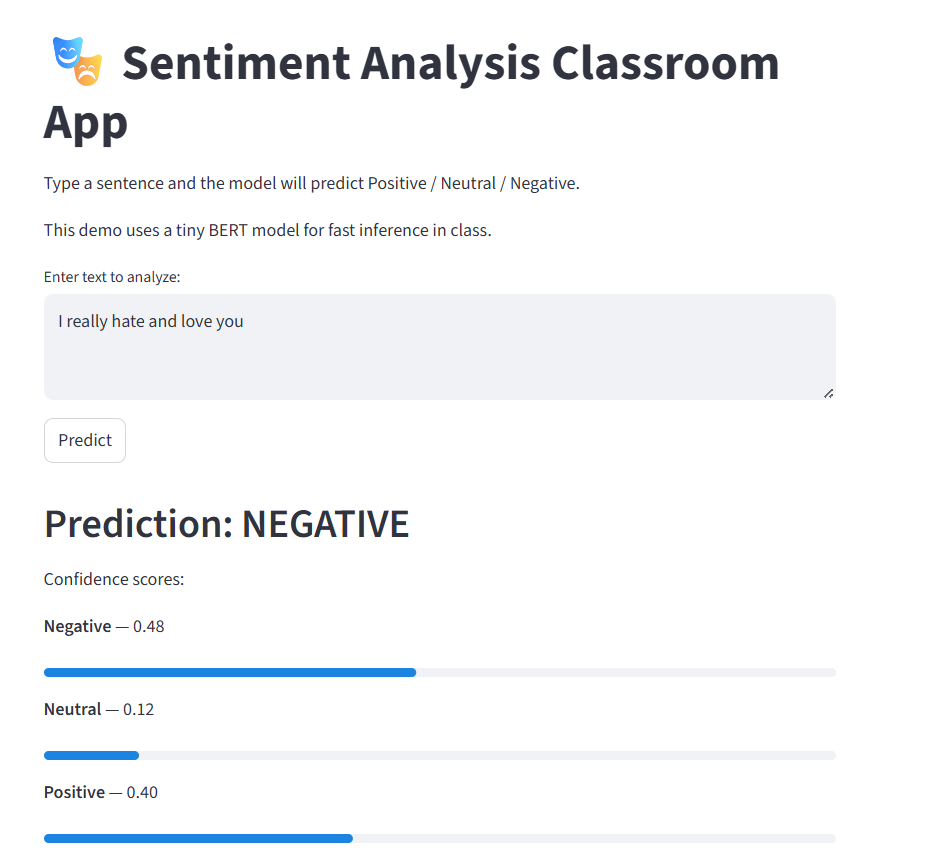